<a href="https://colab.research.google.com/github/dzkha/Shogi-Post/blob/master/Shogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
matches = pd.DataFrame()
matches = pd.read_csv('birth_matches2.csv',parse_dates=['日付','birth'])
summary = pd.read_csv('birth_sum.csv',parse_dates=['birth'])

In [0]:
matches.dtypes

Unnamed: 0             int64
年度                     int64
日付            datetime64[ns]
手番                    object
星                     object
連勝                     int64
レート(変動)               object
対局相手                  object
段位                    object
レート(変動).1             object
期数                    object
棋戦名                   object
詳細1                   object
詳細2                   object
詳細3                   object
持将棋                  float64
千日手                  float64
対局数                    int64
勝                      int64
敗                      int64
勝率                   float64
戦型                    object
name                  object
birth         datetime64[ns]
dtype: object

In [0]:
summary

,Unnamed: 0,birth,name,不戦勝,不戦敗,不明勝数,不明勝率,不明敗数,先勝,先勝率,先敗,勝,勝率,千日手,対局数,後勝数,後勝率,後敗数,持,持将棋,敗
0,0,1905-02-21,木村義雄,0,0,3,0.750,1,0,NaN,0,6,0.5000,0,12,3,0.375,5,NaN,0,6
1,0,1904-10-11,萩原淳,3,15,61,0.384,98,13,0.433,17,85,0.3664,1,232,8,0.333,16,1.0,1,146
2,0,1911-09-01,大野源一,2,10,147,0.519,136,120,0.469,136,415,0.4970,9,835,146,0.516,137,1.0,3,419
3,0,1904-10-07,斎藤銀次郎,1,0,101,0.417,141,1,0.091,10,103,0.3977,0,259,0,0.000,5,NaN,0,156
4,0,1903-02-18,市川一郎,0,2,15,0.349,28,1,0.250,3,16,0.3265,1,49,0,NaN,0,NaN,0,33
5,0,1899-10-16,鈴木禎一,0,0,2,0.333,4,1,0.500,1,3,0.3750,0,8,0,NaN,0,NaN,0,5
6,0,1909-07-25,建部和歌夫,0,0,34,0.430,45,1,0.077,12,36,0.3711,0,97,1,0.200,4,NaN,0,61
7,0,1908-12-10,坂口允彦,4,5,132,0.440,168,62,0.300,145,258,0.3468,50,744,60,0.263,168,NaN,0,486
8,0,1914-08-02,塚田正夫,0,12,89,0.536,77,98,0.405,144,286,0.4288,25,667,99,0.401,148,NaN,2,381
9,0,1900-11-15,畝美与吉,1,1,19,0.333,38,1,0.500,1,22,0.3438,0,64,1,0.333,2,NaN,0,42


In [0]:
del summary['Unnamed: 0']

In [0]:
summary['持'].fillna(0,inplace=True)

In [0]:
summary

,name,不戦勝,不戦敗,不明勝数,不明勝率,不明敗数,先勝,先勝率,先敗,勝,勝率,千日手,対局数,後勝数,後勝率,後敗数,持,持将棋,敗
0,木村義雄,0,0,3,0.750,1,0,NaN,0,6,0.5000,0,12,3,0.375,5,0.0,0,6
1,萩原淳,3,15,61,0.384,98,13,0.433,17,85,0.3664,1,232,8,0.333,16,1.0,1,146
2,大野源一,2,10,147,0.519,136,120,0.469,136,415,0.4970,9,835,146,0.516,137,1.0,3,419
3,斎藤銀次郎,1,0,101,0.417,141,1,0.091,10,103,0.3977,0,259,0,0.000,5,0.0,0,156
4,市川一郎,0,2,15,0.349,28,1,0.250,3,16,0.3265,1,49,0,NaN,0,0.0,0,33
5,鈴木禎一,0,0,2,0.333,4,1,0.500,1,3,0.3750,0,8,0,NaN,0,0.0,0,5
6,建部和歌夫,0,0,34,0.430,45,1,0.077,12,36,0.3711,0,97,1,0.200,4,0.0,0,61
7,坂口允彦,4,5,132,0.440,168,62,0.300,145,258,0.3468,50,744,60,0.263,168,0.0,0,486
8,塚田正夫,0,12,89,0.536,77,98,0.405,144,286,0.4288,25,667,99,0.401,148,0.0,2,381
9,畝美与吉,1,1,19,0.333,38,1,0.500,1,22,0.3438,0,64,1,0.333,2,0.0,0,42


In [0]:
matches

,Unnamed: 0,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,birth
0,0,1953,1954-03-26,後,●,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0000,四間飛車,1905-02-21
1,1,1954,1954-04-08,後,○,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,2,1,1,0.5000,相掛かり,1905-02-21
2,2,1954,1954-05-13,不,○,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,3,2,1,0.6667,NaN,1905-02-21
3,3,1955,1955-04-14,後,●,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,4,2,2,0.5000,中飛車,1905-02-21
4,4,1955,1955-04-17,不,○,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,5,3,2,0.6000,NaN,1905-02-21
5,5,1955,1955-11-30,後,○,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,6,4,2,0.6667,四間飛車,1905-02-21
6,6,1955,1956-03-13,不,○,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,7,5,2,0.7143,NaN,1905-02-21
7,7,1955,1956-03-19,後,○,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,8,6,2,0.7500,矢倉,1905-02-21
8,8,1956,1956-12-20,後,●,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,9,6,3,0.6667,矢倉,1905-02-21
9,9,1957,1957-05-17,後,●,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,10,6,4,0.6000,相居飛車力戦,1905-02-21


In [0]:
di = {'●':0,'○':1,'■':0,'□':1,'持':.5}
matches.replace({"星": di},inplace=True)

In [0]:
del matches['Unnamed: 0']

In [0]:
matches

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,name
0,1953,1954-03-26,後,0,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0000,四間飛車,木村義雄
1,1954,1954-04-08,後,1,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,2,1,1,0.5000,相掛かり,木村義雄
2,1954,1954-05-13,不,1,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,3,2,1,0.6667,NaN,木村義雄
3,1955,1955-04-14,後,0,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,4,2,2,0.5000,中飛車,木村義雄
4,1955,1955-04-17,不,1,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,5,3,2,0.6000,NaN,木村義雄
5,1955,1955-11-30,後,1,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,6,4,2,0.6667,四間飛車,木村義雄
6,1955,1956-03-13,不,1,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,7,5,2,0.7143,NaN,木村義雄
7,1955,1956-03-19,後,1,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,8,6,2,0.7500,矢倉,木村義雄
8,1956,1956-12-20,後,0,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,9,6,3,0.6667,矢倉,木村義雄
9,1957,1957-05-17,後,0,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,10,6,4,0.6000,相居飛車力戦,木村義雄


In [0]:
matches['手番'].unique()

array(['後', '不', '先', '-'], dtype=object)

In [0]:
matches['星'].unique()

array([0. , 1. , 0.5, nan])

In [0]:
matches[matches['手番']=='不']

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,name
2,1954,1954-05-13,不,1.0,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,3,2,1,0.6667,NaN,木村義雄
4,1955,1955-04-17,不,1.0,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,5,3,2,0.6000,NaN,木村義雄
6,1955,1956-03-13,不,1.0,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,7,5,2,0.7143,NaN,木村義雄
10,1958,1958-07-25,不,0.0,0,(±00),廣津久雄,七,1551(±00),第05回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,11,6,5,0.5455,NaN,木村義雄
12,1953,1953-11-02,不,0.0,0,1492(-08),高島一岐代,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,NaN,NaN,1,0,1,0.0000,NaN,萩原淳
13,1953,1953-11-12,不,0.0,-2,1484(-08),梶一郎,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,NaN,NaN,2,0,2,0.0000,NaN,萩原淳
14,1953,1954-01-08,不,1.0,0,1493(+09),二上達也,六,1498(-09),第05期,九段戦,二次予選,05組,01回戦,NaN,NaN,3,1,2,0.3333,NaN,萩原淳
15,1953,1954-01-12,不,1.0,2,1502(+09),佐瀬勇次,七,1513(-09),第05期,九段戦,二次予選,05組,決勝,NaN,NaN,4,2,2,0.5000,NaN,萩原淳
17,1953,1954-01-27,不,0.5,-1,1493(±00),松浦卓造,七,1497(±00),第08期,順位戦,B級1組,NaN,NaN,NaN,NaN,6,2,3,0.4000,NaN,萩原淳
19,1953,1954-02-15,不,1.0,2,1510(+09),荒巻三之,八,1514(-09),第08期,順位戦,B級1組,NaN,NaN,NaN,NaN,8,4,3,0.5714,NaN,萩原淳


In [0]:
matches.isna().sum()

年度                0
日付                0
手番                0
星                 8
連勝                0
レート(変動)           0
対局相手              0
段位              234
レート(変動).1         0
期数               59
棋戦名               0
詳細1            1568
詳細2          166995
詳細3           26819
持将棋          237035
千日手          232963
対局数               0
勝                 0
敗                 0
勝率                0
戦型           125347
name              0
dtype: int64

In [0]:
matches[matches['星'].isna() == True]

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,birth
6056,1955,1956-01-26,不,NaN,-5,1507(±00),灘蓮照,八,1537(±00),第10期,順位戦,A級,NaN,NaN,NaN,NaN,70,38,31,0.5507,NaN,1916-05-18
6213,1960,1960-12-01,不,NaN,-2,1594(±00),芹沢博文,七,1633(±00),第10期,王将戦,挑戦者決定リーグ戦,NaN,NaN,NaN,2.0,227,118,107,0.5244,NaN,1916-05-18
8279,1957,1957-10-02,後,NaN,-1,1651(±00),灘蓮照,八,1526(±00),第13回,名人A級選抜勝継戦,NaN,NaN,NaN,NaN,1.0,156,102,53,0.6581,先手三間飛車,1923-03-13
22983,1955,1956-01-26,不,NaN,1,1537(±00),高島一岐代,八,1507(±00),第10期,順位戦,A級,NaN,NaN,NaN,NaN,75,38,36,0.5135,NaN,1927-03-16
23038,1957,1957-10-02,先,NaN,0,1526(±00),大山康晴,八,1651(±00),第13回,名人A級選抜勝継戦,NaN,NaN,NaN,NaN,1.0,130,61,67,0.4766,先手三間飛車,1927-03-16
32886,1961,1962-02-09,不,NaN,0,1445(±00),関屋喜代作,四,1497(±00),第16期,順位戦,C級2組,NaN,NaN,NaN,NaN,183,94,88,0.5165,NaN,1935-10-08
42445,1960,1960-12-01,不,NaN,-1,1633(±00),高島一岐代,八,1594(±00),第10期,王将戦,挑戦者決定リーグ戦,NaN,NaN,NaN,2.0,142,95,46,0.6738,NaN,1936-10-23
43415,1961,1962-02-09,不,NaN,0,1497(±00),市川伸,五,1445(±00),第16期,順位戦,C級2組,NaN,NaN,NaN,NaN,139,71,67,0.5145,NaN,1933-12-15


In [0]:
#Drop matches with NaN wins
matches = matches[matches['星'].isna() == False]



In [0]:
matches['星'].unique()

array([0. , 1. , 0.5])

In [0]:
di_playsfirst = {'後':0,'先':1,'-':.5,'不':.5}
matches.replace({'手番': di_playsfirst},inplace=True)



In [0]:
matches

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,name
0,1953,1954-03-26,0.0,0.0,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0000,四間飛車,木村義雄
1,1954,1954-04-08,0.0,1.0,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,2,1,1,0.5000,相掛かり,木村義雄
2,1954,1954-05-13,0.5,1.0,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,3,2,1,0.6667,NaN,木村義雄
3,1955,1955-04-14,0.0,0.0,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,4,2,2,0.5000,中飛車,木村義雄
4,1955,1955-04-17,0.5,1.0,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,5,3,2,0.6000,NaN,木村義雄
5,1955,1955-11-30,0.0,1.0,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,6,4,2,0.6667,四間飛車,木村義雄
6,1955,1956-03-13,0.5,1.0,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,7,5,2,0.7143,NaN,木村義雄
7,1955,1956-03-19,0.0,1.0,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,NaN,NaN,8,6,2,0.7500,矢倉,木村義雄
8,1956,1956-12-20,0.0,0.0,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,9,6,3,0.6667,矢倉,木村義雄
9,1957,1957-05-17,0.0,0.0,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,NaN,NaN,10,6,4,0.6000,相居飛車力戦,木村義雄


In [0]:
matches['段位'].unique()

array(['四', '七', '六', '八', '五', '王将', nan, '九', '九段', '名人', '棋聖', '王位',
       '三', '二冠', '十段', '棋王', '王座', '竜王', 'アマ', '三冠', '四冠', '竜名', '五冠',
       '女流'], dtype=object)

In [0]:
matches[matches['段位']== 'アマ']

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,name
15749,1958,1958-12-19,0.5,0.0,-5,1420(±00),浜野昭次智,アマ,(±00),第10期,九段戦,一次予選,03組,02回戦,NaN,NaN,105,43,62,0.4095,NaN,星田啓三
17083,1958,1958-12-22,1.0,1.0,0,1397(±00),池田大助,アマ,(±00),第10期,九段戦,二次予選,08組,01回戦,NaN,NaN,113,46,67,0.4071,三間飛車,北村秀治郎
23931,1959,1959-12-20,0.5,0.0,-3,1418(±00),平教雄,アマ,(±00),第11期,九段戦,一次予選,01組,01回戦,NaN,NaN,88,32,56,0.3636,NaN,平野広吉
26050,1957,1958-01-13,0.0,1.0,0,1525(±00),藤本正文,アマ,(±00),第09期,九段戦,二次予選,05組,02回戦,NaN,NaN,93,49,44,0.5269,矢倉,二見敬三
26594,1959,1959-12-13,0.5,0.0,-2,1363(±00),村井義夫,アマ,(±00),第11期,九段戦,一次予選,03組,02回戦,NaN,NaN,114,38,76,0.3333,NaN,西本馨
28388,1957,1958-01-18,1.0,1.0,1,1404(±00),若林久雄,アマ,(±00),第09期,九段戦,一次予選,01組,01回戦,NaN,NaN,43,15,28,0.3488,四間飛車,浅沼一
46774,1998,1998-12-22,1.0,1.0,1,1281(±00),林隆弘,アマ,(±00),第12期,竜王戦,6組,ランキング戦,02回戦,NaN,NaN,1047,399,648,0.3811,先手四間飛車,剱持松二
46789,1999,2000-01-28,0.0,1.0,1,1274(±00),早咲誠和,アマ,(±00),第13期,竜王戦,6組,ランキング戦,02回戦,NaN,NaN,1062,403,659,0.3795,四間飛車,剱持松二
48940,1960,1960-11-26,0.5,1.0,0,1468(±00),寺尾直樹,アマ,(±00),第12期,九段戦,一次予選,04組,01回戦,NaN,NaN,31,16,15,0.5161,NaN,北村文男
61694,2000,2000-08-17,1.0,0.0,-1,1596(±00),山田敦幹,アマ,(±00),第19回,全日本プロ,トーナメント戦,NaN,02回戦,NaN,NaN,1436,798,637,0.5561,三間飛車,大内延介


In [0]:
matches['持将棋'].unique()

array([nan,  1.,  2.])

In [0]:
matches['持将棋'].fillna(0,inplace=True)

In [0]:
matches['千日手'].unique()

array([nan,  1.,  2.,  4.,  3.])

In [0]:
matches['千日手'].fillna(0,inplace=True)

In [0]:
header_dict = {'年度':'year', '日付':'date', '手番':'first_move', '星':'win','連勝':'win_streak', 'レート(変動)':'rating(change)','対局相手':'opponent',
               '段位':'dan_title', 'レート(変動).1':'opponent_rating(change)','期数':'tournament_number', '棋戦名':'tournament_name',
               '詳細1':'details1', '詳細2':'details2','詳細3':'details3', '持将棋':'jishogi', '千日手':'sennichite','対局数':'matches',
              '勝':'wins', '敗':'losses', '勝率':'win_rate', '戦型':'strategy'}

matches.rename(header_dict, axis=1,inplace=True)

In [16]:
matches

,年度,日付,手番,星,連勝,レート(変動),対局相手,段位,レート(変動).1,期数,棋戦名,詳細1,詳細2,詳細3,持将棋,千日手,対局数,勝,敗,勝率,戦型,name,birth
0,1953,1954-03-26,0.0,0.0,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,1,0,1,0.0000,四間飛車,木村義雄,1905-02-21
1,1954,1954-04-08,0.0,1.0,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,2,1,1,0.5000,相掛かり,木村義雄,1905-02-21
2,1954,1954-05-13,0.5,1.0,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,3,2,1,0.6667,NaN,木村義雄,1905-02-21
3,1955,1955-04-14,0.0,0.0,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,4,2,2,0.5000,中飛車,木村義雄,1905-02-21
4,1955,1955-04-17,0.5,1.0,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,5,3,2,0.6000,NaN,木村義雄,1905-02-21
5,1955,1955-11-30,0.0,1.0,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,6,4,2,0.6667,四間飛車,木村義雄,1905-02-21
6,1955,1956-03-13,0.5,1.0,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,7,5,2,0.7143,NaN,木村義雄,1905-02-21
7,1955,1956-03-19,0.0,1.0,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,8,6,2,0.7500,矢倉,木村義雄,1905-02-21
8,1956,1956-12-20,0.0,0.0,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,9,6,3,0.6667,矢倉,木村義雄,1905-02-21
9,1957,1957-05-17,0.0,0.0,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,10,6,4,0.6000,相居飛車力戦,木村義雄,1905-02-21


In [0]:
matches['name'].nunique()

323

In [0]:
summary['持'].unique()

array([0., 1., 2., 3.])

In [0]:
matches['対局相手'].nunique()

615

In [0]:
summary_header_dict = {'不戦勝':'unplayed_wins', '不戦敗':'unplayed_losses', '不明勝数':'unknown_if_first_move_wins', '不明勝率':'unknown_if_first_move_winrate',
               '不明敗数':'unknown_if_first_losses','先勝':'go_first_wins', '先勝率':'go_first_winrate','先敗':'go_first_losses',
               '勝':'wins', '勝率':'winrate','千日手':'sennichite', '対局数':'number_of_matches',
               '後勝数':'wins_moving_second', '後勝率':'winrate_moving_second','後敗数':'losses_moving_second', '持':'mochi?', '持将棋':'jishogi', '敗':'losses'}

summary.rename(summary_header_dict, axis=1,inplace=True)

In [0]:
summary

,birth,name,unplayed_wins,unplayed_losses,unknown_if_first_move_wins,unknown_if_first_move_winrate,unknown_if_first_losses,go_first_wins,go_first_winrate,go_first_losses,wins,winrate,sennichite,number_of_matches,wins_moving_second,winrate_moving_second,losses_moving_second,mochi?,jishogi,losses
0,1905-02-21,木村義雄,0,0,3,0.750,1,0,NaN,0,6,0.5000,0,12,3,0.375,5,0.0,0,6
1,1904-10-11,萩原淳,3,15,61,0.384,98,13,0.433,17,85,0.3664,1,232,8,0.333,16,1.0,1,146
2,1911-09-01,大野源一,2,10,147,0.519,136,120,0.469,136,415,0.4970,9,835,146,0.516,137,1.0,3,419
3,1904-10-07,斎藤銀次郎,1,0,101,0.417,141,1,0.091,10,103,0.3977,0,259,0,0.000,5,0.0,0,156
4,1903-02-18,市川一郎,0,2,15,0.349,28,1,0.250,3,16,0.3265,1,49,0,NaN,0,0.0,0,33
5,1899-10-16,鈴木禎一,0,0,2,0.333,4,1,0.500,1,3,0.3750,0,8,0,NaN,0,0.0,0,5
6,1909-07-25,建部和歌夫,0,0,34,0.430,45,1,0.077,12,36,0.3711,0,97,1,0.200,4,0.0,0,61
7,1908-12-10,坂口允彦,4,5,132,0.440,168,62,0.300,145,258,0.3468,50,744,60,0.263,168,0.0,0,486
8,1914-08-02,塚田正夫,0,12,89,0.536,77,98,0.405,144,286,0.4288,25,667,99,0.401,148,0.0,2,381
9,1900-11-15,畝美与吉,1,1,19,0.333,38,1,0.500,1,22,0.3438,0,64,1,0.333,2,0.0,0,42


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


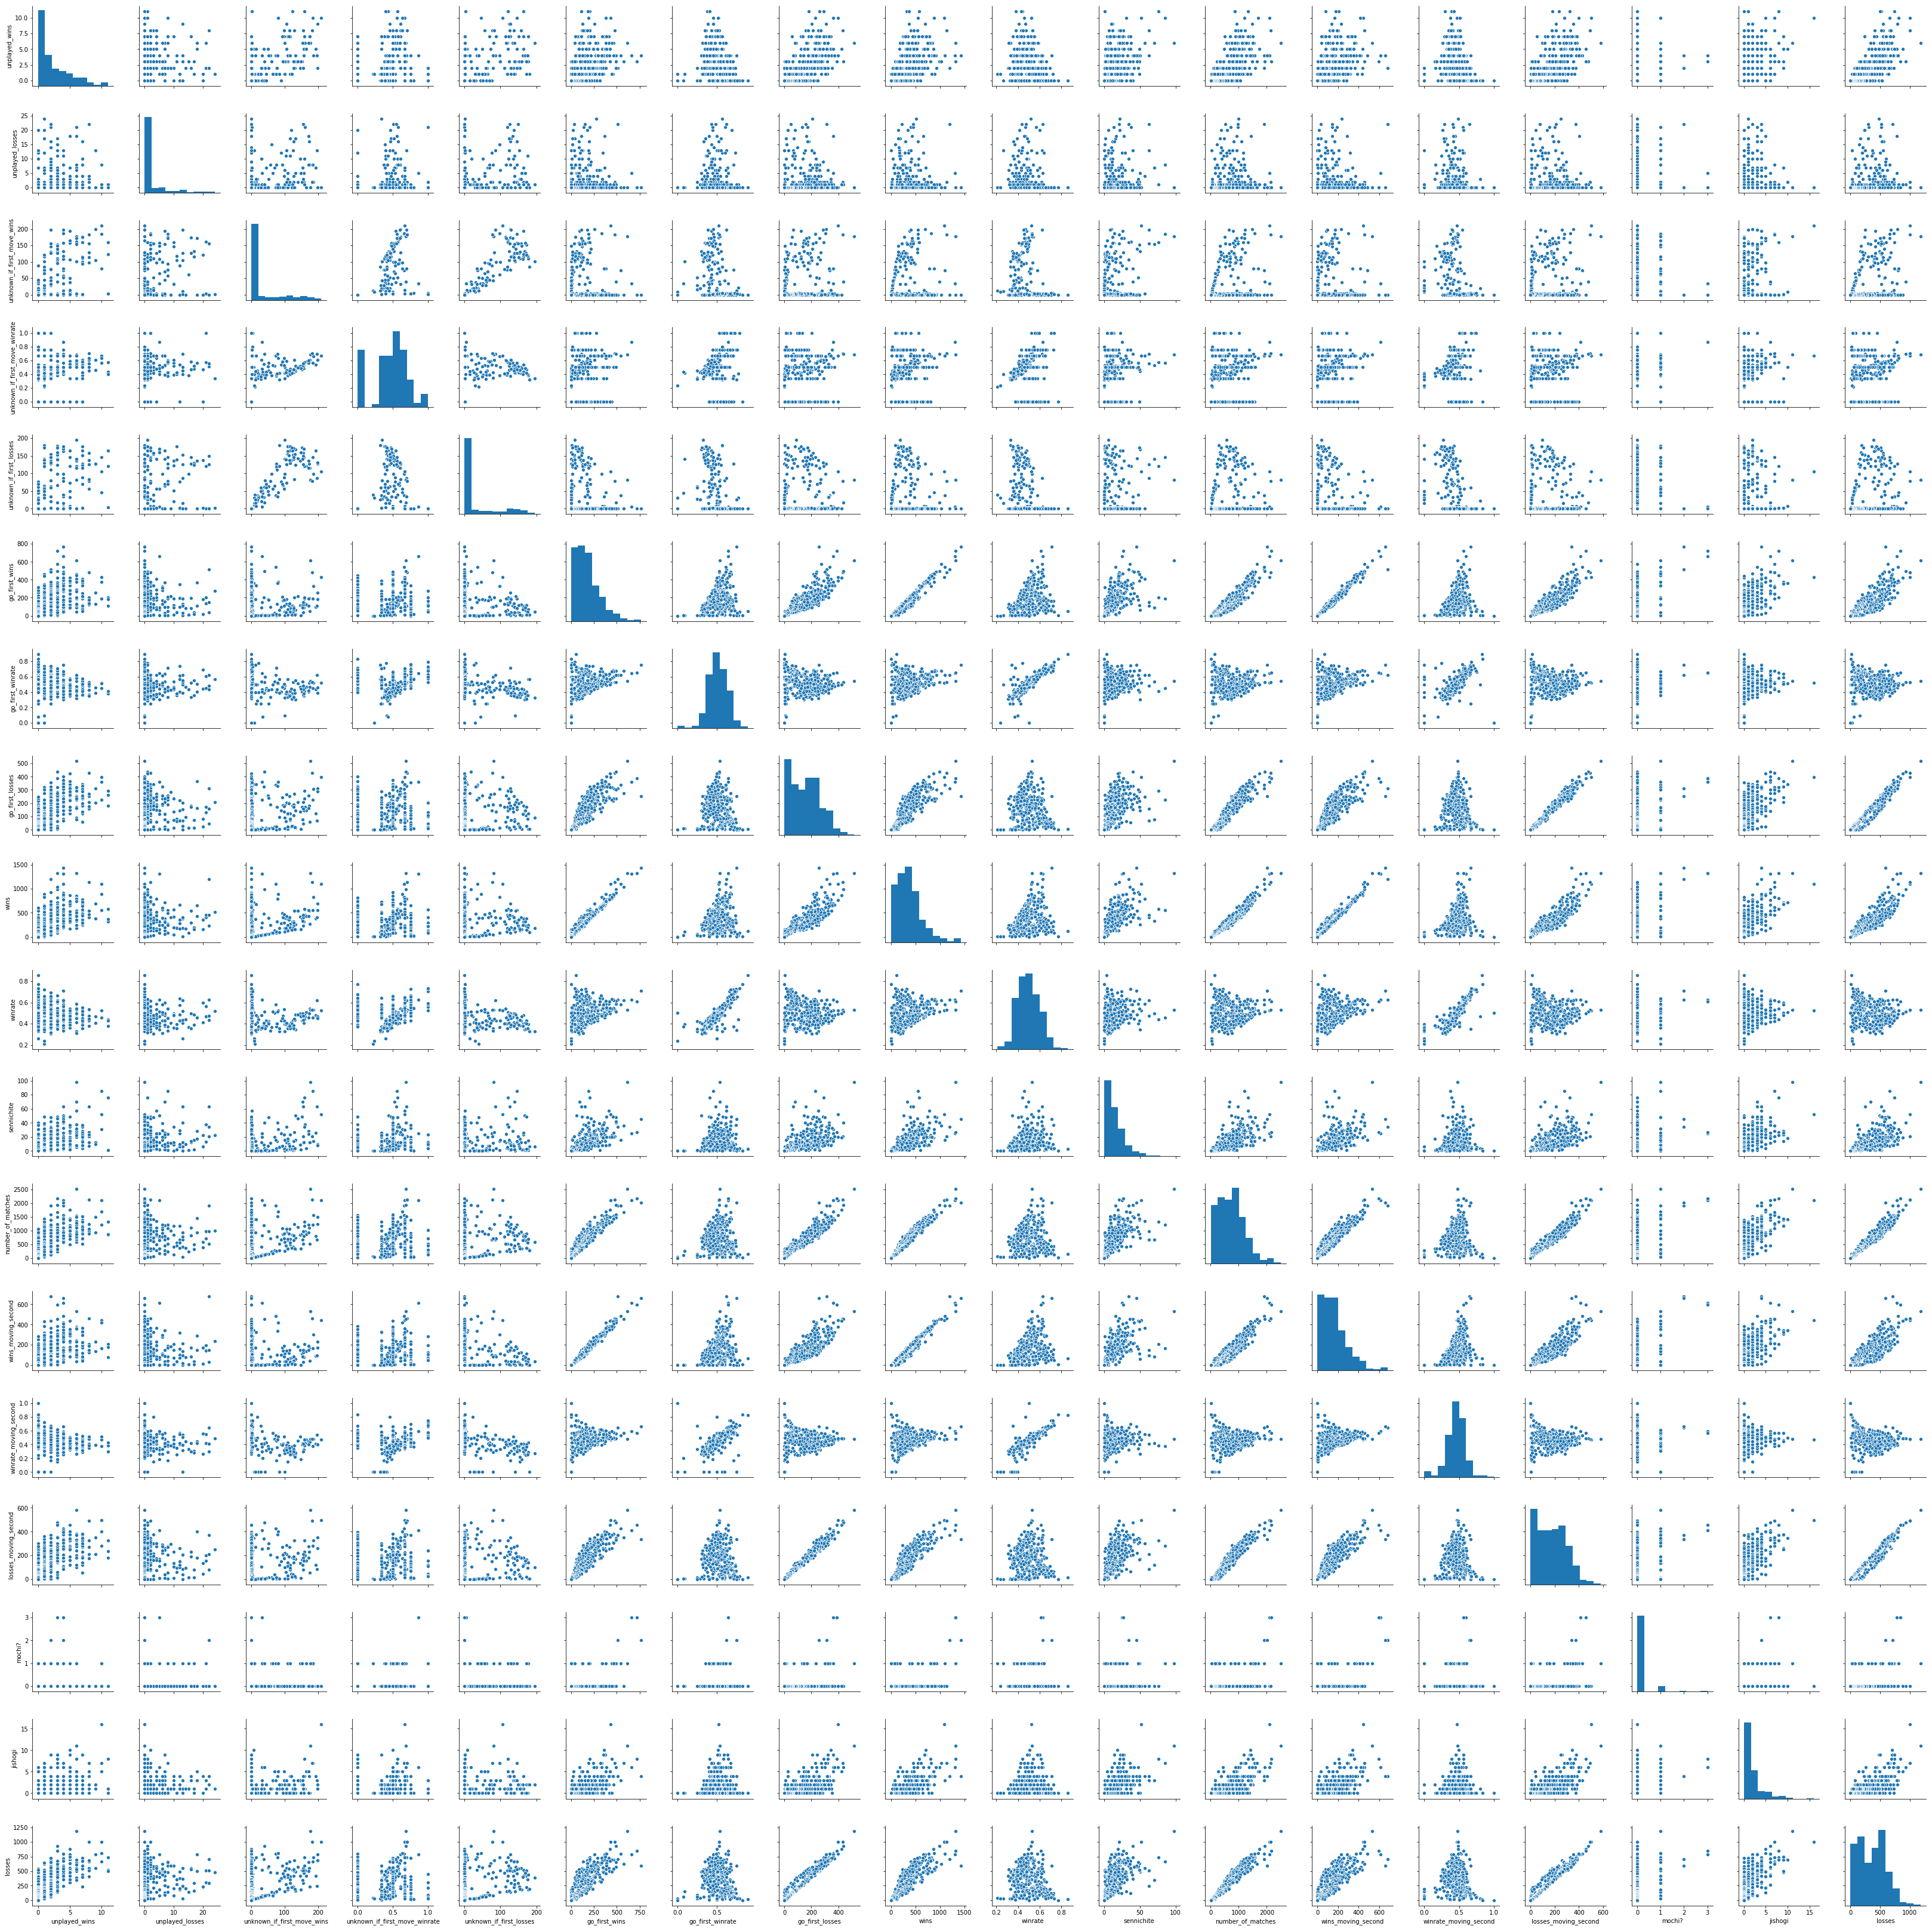

In [0]:
sns.pairplot(summary)

In [0]:
summary.plot(summary.winrate,summary.number_of_matches)

KeyError: ignored

In [0]:
matches['age'] = (matches['date'] - matches['birth'])

In [0]:
matches['age'][0].days

17930

In [0]:
matches['age'] = matches['age'].apply(lambda x : x.days/365.25)

In [0]:
matches

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,birth,age
0,1953,1954-03-26,0.0,0.0,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,1,0,1,0.0000,四間飛車,1905-02-21,49.089665
1,1954,1954-04-08,0.0,1.0,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,2,1,1,0.5000,相掛かり,1905-02-21,49.125257
2,1954,1954-05-13,0.5,1.0,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,3,2,1,0.6667,NaN,1905-02-21,49.221081
3,1955,1955-04-14,0.0,0.0,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,4,2,2,0.5000,中飛車,1905-02-21,50.140999
4,1955,1955-04-17,0.5,1.0,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,5,3,2,0.6000,NaN,1905-02-21,50.149213
5,1955,1955-11-30,0.0,1.0,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,6,4,2,0.6667,四間飛車,1905-02-21,50.770705
6,1955,1956-03-13,0.5,1.0,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,7,5,2,0.7143,NaN,1905-02-21,51.055441
7,1955,1956-03-19,0.0,1.0,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,8,6,2,0.7500,矢倉,1905-02-21,51.071869
8,1956,1956-12-20,0.0,0.0,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,9,6,3,0.6667,矢倉,1905-02-21,51.827515
9,1957,1957-05-17,0.0,0.0,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,10,6,4,0.6000,相居飛車力戦,1905-02-21,52.232717


In [0]:
matches.to_csv('cleaned_matches.csv')
summary.to_csv('cleaned_summary.csv')

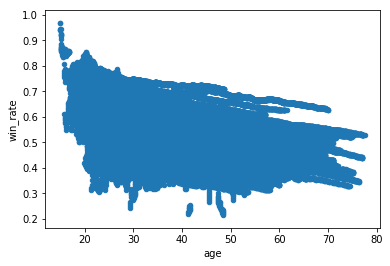

In [0]:
matches[matches['matches'] > 30].plot(x ='age', y='win_rate',kind='scatter')

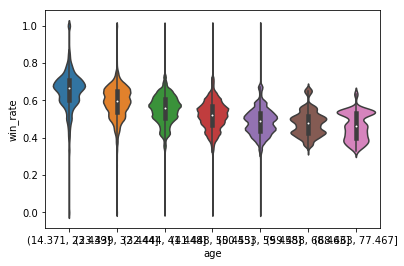

In [0]:
age_bins = pd.cut(matches['age'], 7)
sns.violinplot(age_bins,matches['win_rate'])

Text(0.5, 1.0, 'Win rate by age')

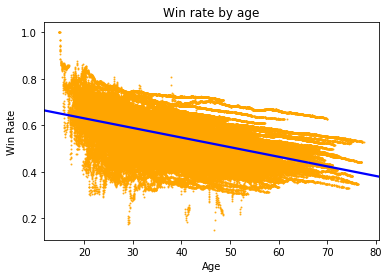

In [0]:
sns.regplot(matches[matches['matches'] > 20]['age'], 
            matches[matches['matches'] > 20]['win_rate'],
            scatter_kws={"color": "orange", "s": 1}, 
            line_kws={"color": "blue"})
plt.xlabel("Age")
plt.ylabel("Win Rate")
plt.title("Win rate by age")



In [0]:
matches['rating'] = matches['rating(change)'].apply(lambda x : x[:-5])

In [0]:
matches['opponent_rating'] = matches['opponent_rating(change)'].apply(lambda x : x[:-5])

In [0]:
matches

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,birth,age,rating
0,1953,1954-03-26,0.0,0.0,-1,(±00),北村昌男,四,1561(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,1,0,1,0.0000,四間飛車,1905-02-21,49.089665,
1,1954,1954-04-08,0.0,1.0,0,(±00),山本武雄,七,1523(±00),第01回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,2,1,1,0.5000,相掛かり,1905-02-21,49.125257,
2,1954,1954-05-13,0.5,1.0,2,(±00),廣津久雄,七,1495(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,3,2,1,0.6667,NaN,1905-02-21,49.221081,
3,1955,1955-04-14,0.0,0.0,-1,(±00),山田道美,六,1571(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,4,2,2,0.5000,中飛車,1905-02-21,50.140999,
4,1955,1955-04-17,0.5,1.0,0,(±00),五十嵐豊一,八,1570(±00),第02回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,5,3,2,0.6000,NaN,1905-02-21,50.149213,
5,1955,1955-11-30,0.0,1.0,0,(±00),加藤一二三,五,1623(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,6,4,2,0.6667,四間飛車,1905-02-21,50.770705,
6,1955,1956-03-13,0.5,1.0,0,(±00),梶一郎,八,1515(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,7,5,2,0.7143,NaN,1905-02-21,51.055441,
7,1955,1956-03-19,0.0,1.0,4,(±00),加藤博二,七,1569(±00),第03回,三社杯争奪B級トーナメント,優勝模範対局,NaN,NaN,0.0,0.0,8,6,2,0.7500,矢倉,1905-02-21,51.071869,
8,1956,1956-12-20,0.0,0.0,0,(±00),二上達也,八,1566(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,9,6,3,0.6667,矢倉,1905-02-21,51.827515,
9,1957,1957-05-17,0.0,0.0,0,(±00),加藤一二三,七,1660(±00),NaN,静岡新聞,NaN,NaN,NaN,0.0,0.0,10,6,4,0.6000,相居飛車力戦,1905-02-21,52.232717,


In [0]:
matches[matches['date']=='2019-01-09']

# If I wanted to merge the duplicates it would start something like this, however I think it's easier to leave as is
# for row1 in matches:
#     for row in matches[matches['date']=day]:
#       if (row1['opponent'] == row['name']) and (row1['name'] == row['opponent'])  
      
#Need to add win_streak, dan_title, matches, wins, losses, win_rate

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,name,birth
124022,2018,2019-01-09,1.0,0.0,0,1544(-05),戸辺誠,七,1673(+05),第90期,棋聖戦,二次予選,03組,02回戦,0.0,0.0,1435,770,665,0.5366,NaN,中村修,1962-11-07
131532,2018,2019-01-09,0.0,0.0,0,1432(-05),川上猛,七,1567(+05),第69期,王将戦,一次予選,05組,01回戦,0.0,0.0,1207,573,634,0.4747,NaN,神谷広志,1961-04-21
140580,2018,2019-01-09,0.0,1.0,2,1495(+10),伊奈祐介,六,1559(-10),第45期,棋王戦,予選,07組,01回戦,0.0,0.0,994,516,478,0.5191,NaN,有森浩三,1963-02-13
144009,2018,2019-01-09,1.0,0.0,-3,1417(-02),大橋貴洸,四,1758(+02),第45期,棋王戦,予選,07組,02回戦,0.0,0.0,1096,520,576,0.4745,NaN,浦野真彦,1964-03-14
148071,2018,2019-01-09,1.0,0.0,0,1375(-08),高田尚平,七,1407(+08),第69期,王将戦,一次予選,04組,01回戦,0.0,0.0,954,426,528,0.4465,NaN,小林宏,1962-12-18
151438,2018,2019-01-09,1.0,0.0,0,1617(-03),糸谷哲郎,八,1847(+03),第67期,王座戦,二次予選,05組,02回戦,0.0,0.0,1331,784,547,0.5890,NaN,阿部隆,1967-08-25
159509,2018,2019-01-09,1.0,0.0,0,1435(-07),島本亮,五,1471(+07),第45期,棋王戦,予選,06組,02回戦,0.0,0.0,1056,538,518,0.5095,NaN,長沼洋,1965-02-08
160619,2018,2019-01-09,0.0,0.0,-1,1454(-03),大石直嗣,七,1701(+03),第45期,棋王戦,予選,08組,02回戦,0.0,0.0,1101,580,521,0.5268,NaN,神崎健二,1963-12-08
172637,2018,2019-01-09,0.0,1.0,0,1407(+08),小林宏,七,1375(-08),第69期,王将戦,一次予選,04組,01回戦,0.0,0.0,784,359,425,0.4579,NaN,高田尚平,1962-06-21
176068,2018,2019-01-09,0.0,0.0,-1,1775(-08),八代弥,六,1783(+08),第90期,棋聖戦,二次予選,03組,02回戦,0.0,0.0,1406,885,521,0.6294,一手損角換わり,丸山忠久,1970-09-05


In [0]:
s = "1501(-09)"
s[:-5]

'1501'

In [0]:
matches.dtypes

year                                int64
date                       datetime64[ns]
first_move                        float64
win                               float64
win_streak                          int64
rating(change)                     object
opponent                           object
dan_title                          object
opponent_rating(change)            object
tournament_number                  object
tournament_name                    object
details1                           object
details2                           object
details3                           object
jishogi                           float64
sennichite                        float64
matches                             int64
wins                                int64
losses                              int64
win_rate                          float64
strategy                           object
birth                      datetime64[ns]
age                               float64
rating                            

In [24]:
# new_matches = pd.DataFrame()
new_matches = matches[matches['rating'] != '']
new_matches['rating'] = new_matches['rating'].apply(lambda x : int(x))
new_matches2 = new_matches[new_matches['opponent_rating'] != '']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:

new_matches2['opponent_rating'] = new_matches2['opponent_rating'].apply(lambda x : int(x))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Rating by age')

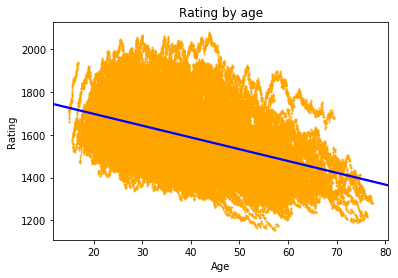

In [0]:
sns.regplot(new_matches[new_matches['matches'] > 20]['age'], 
            new_matches[new_matches['matches'] > 20]['rating'],
            scatter_kws={"color": "orange", "s": 1}, 
            line_kws={"color": "blue"})
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Rating by age")


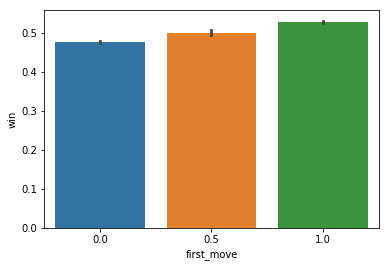

In [74]:
sns.barplot(matches['first_move'], 
            matches['win'],
       )

In [26]:
new_matches2['rating_difference'] = new_matches2['rating'] - new_matches2['opponent_rating']  
new_matches2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,name,birth,age,rating,opponent_rating,rating_difference
12,1953,1953-11-02,0.5,0.0,0,1492(-08),高島一岐代,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,1,0,1,0.0000,NaN,萩原淳,1904-10-11,49.059548,1492,1508,-16
13,1953,1953-11-12,0.5,0.0,-2,1484(-08),梶一郎,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,2,0,2,0.0000,NaN,萩原淳,1904-10-11,49.086927,1484,1508,-24
14,1953,1954-01-08,0.5,1.0,0,1493(+09),二上達也,六,1498(-09),第05期,九段戦,二次予選,05組,01回戦,0.0,0.0,3,1,2,0.3333,NaN,萩原淳,1904-10-11,49.242984,1493,1498,-5
15,1953,1954-01-12,0.5,1.0,2,1502(+09),佐瀬勇次,七,1513(-09),第05期,九段戦,二次予選,05組,決勝,0.0,0.0,4,2,2,0.5000,NaN,萩原淳,1904-10-11,49.253936,1502,1513,-11
16,1953,1954-01-21,0.0,0.0,0,1493(-09),板谷四郎,八,1488(+09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,5,2,3,0.4000,角換わり,萩原淳,1904-10-11,49.278576,1493,1488,5
17,1953,1954-01-27,0.5,0.5,-1,1493(±00),松浦卓造,七,1497(±00),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,6,2,3,0.4000,NaN,萩原淳,1904-10-11,49.295003,1493,1497,-4
18,1953,1954-01-30,1.0,1.0,0,1501(+08),灘蓮照,八,1500(-08),第03回,全八段戦,トーナメント戦,NaN,01回戦,0.0,0.0,7,3,3,0.5000,中飛車,萩原淳,1904-10-11,49.303217,1501,1500,1
19,1953,1954-02-15,0.5,1.0,2,1510(+09),荒巻三之,八,1514(-09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,8,4,3,0.5714,NaN,萩原淳,1904-10-11,49.347023,1510,1514,-4
20,1953,1954-02-28,0.0,0.0,0,1501(-09),坂口允彦,八,1488(+09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,9,4,4,0.5000,角換わり,萩原淳,1904-10-11,49.382615,1501,1488,13
21,1953,1954-03-10,0.0,0.0,0,1494(-07),北村昌男,四,1571(+07),第05期,九段戦,三次予選,01組,01回戦,0.0,0.0,10,4,5,0.4444,角換わり,萩原淳,1904-10-11,49.409993,1494,1571,-77


Shogi, Japanese chess, is an ancient game that has been played professionally for centuries. 

In [0]:
diff_bins = pd.cut(new_matches2[new_matches2['rating_difference']>0]['rating_difference'], 15)

Text(0.5, 1.0, 'Wins by rating differences')

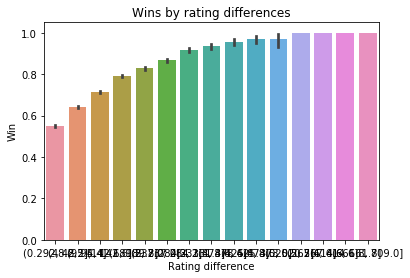

In [0]:
#Have to redo this so that negative and positive differences are not counted the same


sns.barplot(diff_bins,                                                     #new_matches2[new_matches2['rating_difference']>0]['rating_difference'], 
            new_matches2[new_matches2['rating_difference']>0]['win'])
#             scatter_kws={"color": "orange", "s": 1}, 
#             line_kws={"color": "blue"})
plt.xlabel("Rating difference")
plt.ylabel("Win")
plt.title("Wins by rating differences")
plt.xticks



In [0]:
summary.to_csv("summary.csv")
matches.to_csv("matches.csv")

TypeError: ignored

In [41]:
mean_winrate = []
matches_20 = matches[matches['matches'] > 20]
for age in range(10,80):
  mean = matches_20[matches['age']>age][matches['age']<(age+1)]['win_rate'].mean()
  mean_winrate.append(mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will

In [0]:
mean_winrate = mean_winrate[4:-1]

In [39]:
mean_winrate[0]

(14, 0.9919333333333333)

In [45]:
len(mean_winrate)

65

In [46]:
len(range(14,79))

65

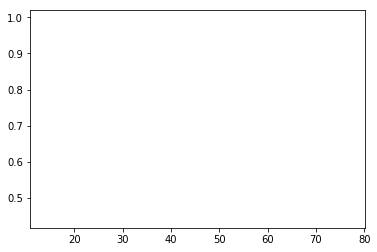

In [38]:
for i in range(14,79)):
    plt.plot(mean_winrate[i][0],mean_winrate[i][1])



In [44]:
sns.regplot(range(14,79),mean_winrate)

ValueError: ignored

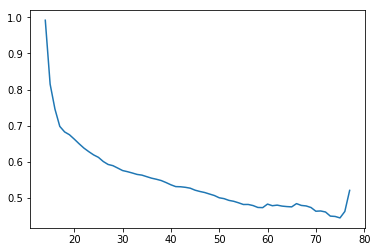

In [47]:
plt.plot(range(14,79),mean_winrate)

In [55]:
mean_rating = []
matches_20 = new_matches2[new_matches2['matches'] > 20]
for age in range(10,80):
  mean = matches_20[new_matches2['age']>age][new_matches2['age']<(age+1)]['rating'].mean()
  mean_rating.append(mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will

In [53]:
mean_rating

[nan,
 nan,
 nan,
 nan,
 1690.3636363636363,
 1698.1517857142858,
 1689.771573604061,
 1649.527659574468,
 1649.52551477171,
 1658.4693654266957,
 1656.7016447368421,
 1658.284715750233,
 1669.182791586998,
 1672.791019581364,
 1670.1746508484757,
 1665.57586537146,
 1655.920743768957,
 1651.221410579345,
 1654.3844532606001,
 1649.9094453527857,
 1640.9783763277694,
 1638.5001270971022,
 1635.505727224294,
 1631.6293222683264,
 1635.7878446820484,
 1631.488568162332,
 1623.9652173913043,
 1620.8577023498694,
 1612.916934373566,
 1604.6368206094878,
 1597.6922955478371,
 1590.9935355544505,
 1589.421052631579,
 1587.5009333107075,
 1581.022570076447,
 1570.5779799128293,
 1558.1647387315516,
 1551.911149825784,
 1540.0428671820098,
 1530.3096022295415,
 1517.2706040268456,
 1510.462821600226,
 1500.9063079777366,
 1494.5024925224327,
 1486.5462270564242,
 1478.6672996581847,
 1477.0747623163354,
 1469.302561623973,
 1461.4944779116465,
 1460.3462414578587,
 1476.3976945244956,
 1463.92

In [0]:
mean_rating = mean_rating[4:-1]

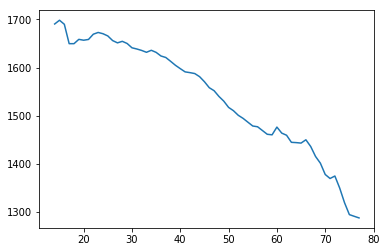

In [57]:


plt.plot(range(14,79),mean_rating)

Text(0.5, 1.0, 'Rating by age')

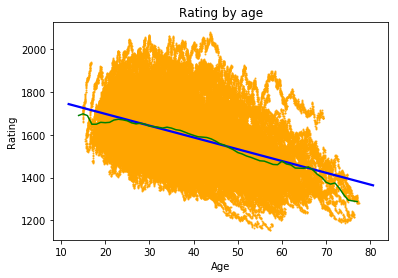

In [59]:
sns.regplot(new_matches[new_matches['matches'] > 20]['age'], 
            new_matches[new_matches['matches'] > 20]['rating'],
            scatter_kws={"color": "orange", "s": 1}, 
            line_kws={"color": "blue"})
plt.plot(range(14,79),mean_rating,color='green')
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Rating by age")


In [63]:
new_matches2

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,name,birth,age,rating,opponent_rating
12,1953,1953-11-02,0.5,0.0,0,1492(-08),高島一岐代,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,1,0,1,0.0000,NaN,萩原淳,1904-10-11,49.059548,1492,1508
13,1953,1953-11-12,0.5,0.0,-2,1484(-08),梶一郎,八,1508(+08),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,2,0,2,0.0000,NaN,萩原淳,1904-10-11,49.086927,1484,1508
14,1953,1954-01-08,0.5,1.0,0,1493(+09),二上達也,六,1498(-09),第05期,九段戦,二次予選,05組,01回戦,0.0,0.0,3,1,2,0.3333,NaN,萩原淳,1904-10-11,49.242984,1493,1498
15,1953,1954-01-12,0.5,1.0,2,1502(+09),佐瀬勇次,七,1513(-09),第05期,九段戦,二次予選,05組,決勝,0.0,0.0,4,2,2,0.5000,NaN,萩原淳,1904-10-11,49.253936,1502,1513
16,1953,1954-01-21,0.0,0.0,0,1493(-09),板谷四郎,八,1488(+09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,5,2,3,0.4000,角換わり,萩原淳,1904-10-11,49.278576,1493,1488
17,1953,1954-01-27,0.5,0.5,-1,1493(±00),松浦卓造,七,1497(±00),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,6,2,3,0.4000,NaN,萩原淳,1904-10-11,49.295003,1493,1497
18,1953,1954-01-30,1.0,1.0,0,1501(+08),灘蓮照,八,1500(-08),第03回,全八段戦,トーナメント戦,NaN,01回戦,0.0,0.0,7,3,3,0.5000,中飛車,萩原淳,1904-10-11,49.303217,1501,1500
19,1953,1954-02-15,0.5,1.0,2,1510(+09),荒巻三之,八,1514(-09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,8,4,3,0.5714,NaN,萩原淳,1904-10-11,49.347023,1510,1514
20,1953,1954-02-28,0.0,0.0,0,1501(-09),坂口允彦,八,1488(+09),第08期,順位戦,B級1組,NaN,NaN,0.0,0.0,9,4,4,0.5000,角換わり,萩原淳,1904-10-11,49.382615,1501,1488
21,1953,1954-03-10,0.0,0.0,0,1494(-07),北村昌男,四,1571(+07),第05期,九段戦,三次予選,01組,01回戦,0.0,0.0,10,4,5,0.4444,角換わり,萩原淳,1904-10-11,49.409993,1494,1571


In [72]:
new_matches2[new_matches2['year'] == 1953].iloc[31492]

IndexError: ignored

In [80]:
new_matches2.sort_values(by=['date'])

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,name,birth,age,rating,opponent_rating
244,1953,1953-10-20,0.0,0.0,-1,1492(-08),高島一岐代,八,1508(+08),第02回,全八段戦,トーナメント戦,NaN,決勝,0.0,0.0,1,0,1,0.0000,向飛車,大野源一,1911-09-01,42.135524,1492,1508
31491,1953,1953-10-20,0.5,1.0,0,1508(+08),佐藤豊,四,1492(-08),第08期,順位戦,C級2組,NaN,NaN,0.0,0.0,1,1,0,1.0000,NaN,北村昌男,1934-10-30,18.973306,1508,1492
31126,1953,1953-10-20,0.5,0.0,0,1492(-08),吉田六彦,六,1508(+08),第08期,順位戦,C級2組,NaN,NaN,0.0,0.0,1,0,1,0.0000,NaN,津村常吉,1923-07-28,30.231348,1492,1508
13671,1953,1953-10-20,0.5,1.0,0,1508(+08),津村常吉,四,1492(-08),第08期,順位戦,C級2組,NaN,NaN,0.0,0.0,1,1,0,1.0000,NaN,吉田六彦,1910-03-01,43.638604,1508,1492
5987,1953,1953-10-20,1.0,1.0,1,1508(+08),大野源一,八,1492(-08),第02回,全八段戦,トーナメント戦,NaN,決勝,0.0,0.0,1,1,0,1.0000,向飛車,高島一岐代,1916-05-18,37.423682,1508,1492
6327,1953,1953-10-20,0.5,1.0,0,1508(+08),山川次彦,七,1492(-08),第08期,順位戦,C級1組,NaN,NaN,0.0,0.0,1,1,0,1.0000,NaN,橋爪敏太郎,1909-03-17,44.594114,1508,1492
18645,1953,1953-10-20,0.5,0.0,-1,1492(-08),橋爪敏太郎,六,1508(+08),第08期,順位戦,C級1組,NaN,NaN,0.0,0.0,1,0,1,0.0000,NaN,山川次彦,1920-01-18,33.754962,1492,1508
24835,1953,1953-10-20,0.5,0.0,-1,1492(-08),北村昌男,四,1508(+08),第08期,順位戦,C級2組,NaN,NaN,0.0,0.0,1,0,1,0.0000,NaN,佐藤豊,1914-07-05,39.293634,1492,1508
1338,1953,1953-10-21,0.5,0.0,-1,1492(-08),木川貴一,五,1508(+08),第08期,順位戦,C級1組,NaN,NaN,0.0,1.0,1,0,1,0.0000,NaN,市川一郎,1903-02-18,50.672142,1492,1508
24877,1953,1953-10-21,0.5,1.0,1,1508(+08),市川一郎,六,1492(-08),第08期,順位戦,C級1組,NaN,NaN,0.0,1.0,1,1,0,1.0000,NaN,木川貴一,1920-01-14,33.768652,1508,1492


In [75]:
new_matches2['name'].unique()

array(['萩原淳', '大野源一', '斎藤銀次郎', '市川一郎', '鈴木禎一', '建部和歌夫', '坂口允彦', '塚田正夫',
       '畝美与吉', '梶一郎', '角田三男', '松下力', '小堀清一', '升田幸三', '高島一岐代', '野村慶虎',
       '橋爪敏太郎', '大和久彪', '荒巻三之', '加藤恵三', '村上真一', '岡崎史明', '松田茂役', '大山康晴',
       '山本武雄', '山中和正', '板谷四郎', '間宮純一', '藤川義夫', '金高清吉', '本間爽悦', '高柳敏夫',
       '廣津久雄', '吉田六彦', '富沢幹雄', '京須行男', '原田泰夫', '星田啓三', '南口繁一', '北村秀治郎',
       '花村元司', '山川次彦', '佐瀬勇次', '加藤博二', '松浦卓造', '丸田祐三', '灘蓮照', '平野広吉',
       '五十嵐豊一', '佐藤豊', '木川貴一', '下平幸男', '二見敬三', '西本馨', '熊谷達人', '清野静男',
       '神田鎮雄', '増田敏二', '浅沼一', '二上達也', '橋本三治', '山田道美', '津村常吉', '北村昌男',
       '市川伸', '関根茂', '大友昇', '佐藤庄平', '加藤一二三', '宮坂幸雄', '有吉道夫', '長谷部久雄',
       '芹沢博文', '関屋喜代作', '賀集正三', '大村和久', '大原英二', '剱持松二', '佐藤大五郎', '吉田利勝',
       '北村文男', '内藤國雄', '伊達康夫', '佐伯昌優', '木村嘉孝', '山口千嶺', '木村義徳', '高島弘光',
       '板谷進', '米長邦雄', '大内延介', '西村一義', '木下晃', '山口英夫', '桜井昇', '田辺一郎', '中原誠',
       '桐山清澄', '高田丈資', '河口俊彦', '勝浦修', '石田和雄', '若松政和', '森安秀光', '森雞二',
       '滝誠一郎', '池田修一', '野本虎次', '田中魁秀', '坪内利幸', '佐藤義則', '安恵照剛', '森安正幸',
    

In [30]:
new_matches2[new_matches2['year'] == 2010]

,year,date,first_move,win,win_streak,rating(change),opponent,dan_title,opponent_rating(change),tournament_number,tournament_name,details1,details2,details3,jishogi,sennichite,matches,wins,losses,win_rate,strategy,name,birth,age,rating,opponent_rating,rating_difference
37687,2010,2010-04-01,0.0,0.0,-5,1467(-05),遠山雄亮,四,1627(+05),第23期,竜王戦,5組,昇級者決定戦,01回戦,0.0,0.0,2332,1282,1049,0.5500,先手中飛車,加藤一二三,1940-01-01,70.247775,1467,1627,-160
37688,2010,2010-04-08,0.0,1.0,1,1481(+14),戸辺誠,六,1795(-14),第36期,棋王戦,予選,NaN,03回戦,0.0,0.0,2333,1283,1049,0.5502,NaN,加藤一二三,1940-01-01,70.266940,1481,1795,-314
37689,2010,2010-05-06,1.0,0.0,-1,1476(-05),佐藤秀司,七,1613(+05),第36期,棋王戦,予選,NaN,04回戦,0.0,0.0,2334,1283,1050,0.5499,四間飛車,加藤一二三,1940-01-01,70.343600,1476,1613,-137
37690,2010,2010-06-08,0.0,1.0,1,1484(+08),森雞二,九,1457(-08),第69期,順位戦,C級1組,NaN,01回戦,0.0,0.0,2335,1284,1050,0.5501,相掛かり,加藤一二三,1940-01-01,70.433949,1484,1457,27
37691,2010,2010-07-06,1.0,0.0,0,1479(-05),金井恒太,五,1624(+05),第69期,順位戦,C級1組,NaN,02回戦,0.0,0.0,2336,1284,1051,0.5499,矢倉,加藤一二三,1940-01-01,70.510609,1479,1624,-145
37692,2010,2010-07-22,1.0,0.0,0,1470(-09),藤倉勇樹,四,1428(+09),第19回,銀河戦,予選,NaN,NaN,0.0,0.0,2337,1284,1052,0.5497,NaN,加藤一二三,1940-01-01,70.554415,1470,1428,42
37693,2010,2010-08-03,1.0,0.0,-3,1466(-04),田村康介,六,1664(+04),第69期,順位戦,C級1組,NaN,03回戦,0.0,0.0,2338,1284,1053,0.5494,三間飛車,加藤一二三,1940-01-01,70.587269,1466,1664,-198
37694,2010,2010-08-30,1.0,1.0,1,1470(+04),武者野勝巳,七,1260(-04),第04回,朝日杯,一次予選,NaN,02回戦,0.0,0.0,2339,1285,1053,0.5496,NaN,加藤一二三,1940-01-01,70.661191,1470,1260,210
37695,2010,2010-09-07,0.0,0.0,0,1461(-09),内藤國雄,九,1448(+09),第69期,順位戦,C級1組,NaN,04回戦,0.0,0.0,2340,1285,1054,0.5494,横歩取り,加藤一二三,1940-01-01,70.683094,1461,1448,13
37696,2010,2010-09-16,0.0,0.0,0,1458(-03),中田宏樹,八,1707(+03),第52期,王位戦,予選,NaN,02回戦,0.0,0.0,2341,1285,1055,0.5491,NaN,加藤一二三,1940-01-01,70.707734,1458,1707,-249


In [0]:
efficient_df = new_matches2[['year','name','date']]

In [32]:
efficient_df

,year,name,date
12,1953,萩原淳,1953-11-02
13,1953,萩原淳,1953-11-12
14,1953,萩原淳,1954-01-08
15,1953,萩原淳,1954-01-12
16,1953,萩原淳,1954-01-21
17,1953,萩原淳,1954-01-27
18,1953,萩原淳,1954-01-30
19,1953,萩原淳,1954-02-15
20,1953,萩原淳,1954-02-28
21,1953,萩原淳,1954-03-10


In [50]:
#Create a new dataframe with the average rating and winrate for each player for each year

one_name_per_year = pd.DataFrame()
name_list = new_matches2['name'].unique()

years = range(1953,2020)

for year in years:
  print(year)
  year_df = efficient_df.where(efficient_df['year'] == year)#new_matches2[new_matches2['year'] == year]
  for name in name_list:
    one_name_per_year = one_name_per_year.append(
        year_df.where(year_df['name'] == name).sort_values(by=['date'],ascending=False).iloc[0])#[year_df['name'] == name].sort_values(by=['date'],ascending=False).iloc[0])
    
  
  
  
#   names_list = []
#   for i in year_df.index:
#     print(i)
#     year_name = year_df.iloc[i]['name']
#     if year_name in names_list:
#       next
#     else:
#       one_name_per_year.append(year_df.iloc[i])
#       names_list.append(year_name)

1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [51]:
one_name_per_year

,date,name,year
23,1954-03-24,萩原淳,1953.0
256,1954-03-22,大野源一,1953.0
1090,1954-03-15,斎藤銀次郎,1953.0
1346,1954-02-11,市川一郎,1953.0
1392,1954-01-29,鈴木禎一,1953.0
1404,1954-03-04,建部和歌夫,1953.0
1506,1954-03-11,坂口允彦,1953.0
2259,1954-03-30,塚田正夫,1953.0
2910,1954-02-19,畝美与吉,1953.0
2974,1954-02-25,梶一郎,1953.0


In [49]:
#Create a new dataframe with the average rating and winrate for each player for each year

one = pd.DataFrame()
name_list = new_matches2['name'].unique()

year_df = efficient_df.where(efficient_df['year'] == 2019)
print(year_df)
print(year_df.where(year_df['name'] == '本田奎').sort_values(by=['date'],ascending=False).iloc[0])
row = year_df.where(year_df['name'] == '本田奎').sort_values(by=['date'],ascending=False).iloc[0]
df = one.append(row)
print(df)
# for name in name_list:
#   one_name_per_year.append(year_df.where(year_df['name'] == name).sort_values(by=['date'],ascending=False).iloc[0])#

          year  name       date
12         NaN   NaN        NaT
13         NaN   NaN        NaT
14         NaN   NaN        NaT
15         NaN   NaN        NaT
16         NaN   NaN        NaT
17         NaN   NaN        NaT
18         NaN   NaN        NaT
19         NaN   NaN        NaT
20         NaN   NaN        NaT
21         NaN   NaN        NaT
22         NaN   NaN        NaT
23         NaN   NaN        NaT
24         NaN   NaN        NaT
25         NaN   NaN        NaT
26         NaN   NaN        NaT
27         NaN   NaN        NaT
28         NaN   NaN        NaT
29         NaN   NaN        NaT
30         NaN   NaN        NaT
31         NaN   NaN        NaT
32         NaN   NaN        NaT
33         NaN   NaN        NaT
34         NaN   NaN        NaT
35         NaN   NaN        NaT
36         NaN   NaN        NaT
37         NaN   NaN        NaT
38         NaN   NaN        NaT
39         NaN   NaN        NaT
40         NaN   NaN        NaT
41         NaN   NaN        NaT
...     

In [39]:
print(one_name_per_year)

Empty DataFrame
Columns: []
Index: []


In [0]:
#Find age when Elo peaked
#Write out exact loss in wins/elo per year
#Are there players who don't follow this pattern?
#Graph average change in wins/elo by year

In [84]:
print(*range(1953,2020))

1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
